<a href="https://colab.research.google.com/github/Daksh-Dhaker/Neural-Networks/blob/main/Untitled10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
df = pd.read_csv('lending_club_loan_two.csv')

In [27]:
len(df)

396030

In [28]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [72]:
df = df.drop('emp_title',axis =1)

In [73]:
df = df.drop('emp_length',axis =1)

In [74]:
df = df.drop('title',axis =1)

In [75]:
look_up = df.groupby('total_acc').mean()['mort_acc']
def fill(total_acc,mort_acc):
  if(np.isnan(mort_acc)):
    return look_up[total_acc]
  else:
    return mort_acc

df['mort_acc'] = df.apply(lambda x: fill(x['total_acc'],x['mort_acc']),axis =1)

<ipython-input-75-72e28af2bec6>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  look_up = df.groupby('total_acc').mean()['mort_acc']


In [76]:
df = df.dropna() # droping rows with null entries

In [77]:
df.select_dtypes(['object']).columns # selecting all non-numeric entries

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [78]:
df['term'] = df['term'].apply(lambda x: int(x[:3]) )

In [79]:
df = df.drop('grade',axis =1)

In [80]:
# converting sub_grade feature into dummy variables
dummies = pd.get_dummies(df['sub_grade'],drop_first = True)
df = pd.concat([df.drop('sub_grade',axis =1),dummies],axis =1)


In [81]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address', 'A2',
       'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4',
       'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1',
       'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5'],
      dtype='object')

In [82]:
dummies1 = pd.get_dummies(df['verification_status'],drop_first = True)
df = pd.concat([df.drop('verification_status',axis =1),dummies1],axis =1)

In [84]:
dummies1 = pd.get_dummies(df['application_type'],drop_first = True)
df = pd.concat([df.drop('application_type',axis =1),dummies1],axis =1)

In [86]:
dummies1 = pd.get_dummies(df['initial_list_status'],drop_first = True)
df = pd.concat([df.drop('initial_list_status',axis =1),dummies1],axis =1)

In [88]:
dummies1 = pd.get_dummies(df['purpose'],drop_first = True)
df = pd.concat([df.drop('purpose',axis =1),dummies1],axis =1)

In [89]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'issue_d', 'loan_status', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies', 'address', 'A2', 'A3', 'A4', 'A5',
       'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2',
       'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4',
       'F5', 'G1', 'G2', 'G3', 'G4', 'G5', 'Source Verified', 'Verified',
       'INDIVIDUAL', 'JOINT', 'w', 'credit_card', 'debt_consolidation',
       'educational', 'home_improvement', 'house', 'major_purchase', 'medical',
       'moving', 'other', 'renewable_energy', 'small_business', 'vacation',
       'wedding'],
      dtype='object')

In [90]:
def get2(st):
  if(st == 'NONE' or st == 'ANY'):
    return 'OTHER'
  else:
    return st

df['home_ownership'] = df['home_ownership'].apply(get2)

In [92]:
dummies1 = pd.get_dummies(df['home_ownership'],drop_first = True)
df = pd.concat([df.drop('home_ownership',axis =1),dummies1],axis =1)

In [93]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'issue_d',
       'loan_status', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2',
       'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4',
       'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1',
       'G2', 'G3', 'G4', 'G5', 'Source Verified', 'Verified', 'INDIVIDUAL',
       'JOINT', 'w', 'credit_card', 'debt_consolidation', 'educational',
       'home_improvement', 'house', 'major_purchase', 'medical', 'moving',
       'other', 'renewable_energy', 'small_business', 'vacation', 'wedding',
       'OTHER', 'OWN', 'RENT'],
      dtype='object')

In [94]:
df['zipcode'] = df['address'].apply(lambda x : int(x[-5:]))

In [97]:
dummies1 = pd.get_dummies(df['zipcode'],drop_first = True)
df = pd.concat([df.drop('zipcode',axis =1),dummies1],axis =1)

In [99]:
df = df.drop('address',axis =1)

In [100]:
df = df.drop('issue_d',axis =1)

In [102]:
df['earliest_cr_line'] = df['earliest_cr_line'].apply(lambda x: int(x[-4:]))

In [103]:
df.head()

,loan_amnt,term,int_rate,installment,annual_inc,loan_status,dti,earliest_cr_line,open_acc,pub_rec,...,RENT,5113,11650,22690,29597,30723,48052,70466,86630,93700
0,10000.0,36,11.44,329.48,117000.0,Fully Paid,26.24,1990,16.0,0.0,...,1,0,0,1,0,0,0,0,0,0
1,8000.0,36,11.99,265.68,65000.0,Fully Paid,22.05,2004,17.0,0.0,...,0,1,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,43057.0,Fully Paid,12.79,2007,13.0,0.0,...,1,1,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,220.65,54000.0,Fully Paid,2.60,2006,6.0,0.0,...,1,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,55000.0,Charged Off,33.95,1999,13.0,0.0,...,0,0,1,0,0,0,0,0,0,0


In [105]:
from sklearn.model_selection import train_test_split

In [107]:
def get3(st):
  if (st == 'Fully Paid'):
    return 1
  else:
    return 0

df['loan_repaid'] = df['loan_status'].apply(get3)

In [109]:
df = df.drop('loan_status',axis =1)

In [112]:
X = df.drop('loan_repaid',axis =1).values

In [113]:
y = df['loan_repaid'].values

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=101)

In [115]:
from sklearn.preprocessing import MinMaxScaler

In [116]:
scaler = MinMaxScaler()

In [117]:
X_train = scaler.fit_transform(X_train)

In [118]:
X_test = scaler.transform(X_test)

In [121]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [123]:
import tensorflow as tf
from tensorflow.keras.layers import Dropout

In [124]:
model = Sequential()

model.add(Dense(78,activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(39,activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(19,activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(units =1,activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy',optimizer = 'adam')

In [125]:
model.fit(x = X_train, y = y_train, epochs = 25, batch_size = 256,validation_data =(X_test,y_test))

Epoch 1/25
1236/1236 [==============================] - 10s 6ms/step - loss: 0.2975 - val_loss: 0.2652
Epoch 2/25
1236/1236 [==============================] - 9s 8ms/step - loss: 0.2657 - val_loss: 0.2631
Epoch 3/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2630 - val_loss: 0.2627
Epoch 4/25
1236/1236 [==============================] - 6s 5ms/step - loss: 0.2619 - val_loss: 0.2618
Epoch 5/25
1236/1236 [==============================] - 6s 5ms/step - loss: 0.2610 - val_loss: 0.2618
Epoch 6/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2603 - val_loss: 0.2617
Epoch 7/25
1236/1236 [==============================] - 6s 5ms/step - loss: 0.2598 - val_loss: 0.2612
Epoch 8/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2595 - val_loss: 0.2616
Epoch 9/25
1236/1236 [==============================] - 6s 5ms/step - loss: 0.2591 - val_loss: 0.2611
Epoch 10/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.25

In [126]:
loss = pd.DataFrame(model.history.history)

<Axes: >

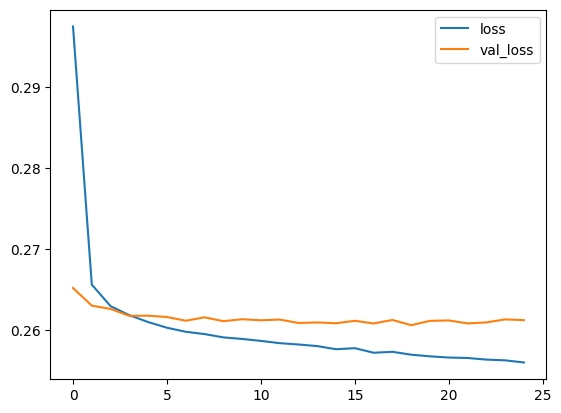

In [127]:
loss.plot()

In [128]:
from sklearn.metrics import classification_report, confusion_matrix

In [129]:
binary_classifications = model.predict(X_test)

2471/2471 [==============================] - 4s 1ms/step


In [133]:
predictions = (binary_classifications > 0.5).astype('int32')

In [135]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.44      0.61     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.93      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



In [136]:
print(confusion_matrix(y_test,predictions))

[[ 6845  8813]
 [  105 63281]]


In [137]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_cos = df.drop('loan_repaid',axis =1).iloc[random_ind]
new_cos

loan_amnt      25000.00
term              60.00
int_rate          18.24
installment      638.11
annual_inc     61665.00
                 ...   
30723              1.00
48052              0.00
70466              0.00
86630              0.00
93700              0.00
Name: 305323, Length: 78, dtype: float64

In [138]:
new_cos = scaler.transform(new_cos.values.reshape(1,78))

In [139]:
(model.predict(new_cos) > 0.5).astype('int32')

1/1 [==============================] - 0s 40ms/step


array([[1]], dtype=int32)